In [ ]:
# =============================================================================
# COMPLETE TRAINING CODE WITH FILE UPLOAD - RUN THIS IN GOOGLE COLAB
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
from google.colab import files

print("🚀 DROPOUT PREDICTION MODEL TRAINING")
print("=" * 60)


🚀 DROPOUT PREDICTION MODEL TRAINING


In [ ]:

# 1. UPLOAD YOUR CSV FILE
print("📁 STEP 1: UPLOAD YOUR CSV FILE")
print("Click 'Choose Files' below and select your 'students_dropout_academic_success.csv' file")
print()

# Upload the file
uploaded = files.upload()

# Get the uploaded filename
file_name = list(uploaded.keys())[0]
print(f"✅ File uploaded: {file_name}")
print()

📁 STEP 1: UPLOAD YOUR CSV FILE
Click 'Choose Files' below and select your 'students_dropout_academic_success.csv' file



Saving students_dropout_academic_success.csv to students_dropout_academic_success.csv
✅ File uploaded: students_dropout_academic_success.csv



In [ ]:

# 2. LOAD DATASET
print("📊 STEP 2: LOADING DATASET...")
df = pd.read_csv(file_name)

print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")
print()


📊 STEP 2: LOADING DATASET...
Dataset loaded: 4424 rows, 37 columns



In [ ]:

# 3. EXPLORE TARGET VARIABLE
print("🎯 STEP 3: ANALYZING TARGET VARIABLE")
print("Target value counts:")
print(df['target'].value_counts())
print()


# Convert target to binary (Dropout=1, Others=0)
df['dropout_risk'] = df['target'].apply(lambda x: 1 if x == 'Dropout' else 0)
print("Binary target created:")
print(df['dropout_risk'].value_counts())
print()

🎯 STEP 3: ANALYZING TARGET VARIABLE
Target value counts:
target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Binary target created:
dropout_risk
0    3003
1    1421
Name: count, dtype: int64



In [ ]:


# 4. SELECT FEATURES
print("🔧 STEP 4: SELECTING FEATURES...")
key_features = [
    'Admission grade',
    'Previous qualification (grade)',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 1st sem (approved)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 2nd sem (enrolled)',
    'Debtor',
    'Tuition fees up to date',
    'Scholarship holder',
    'Age at enrollment',
    'Gender',
    'Unemployment rate',
    'GDP'
]

# Use only features that exist in dataset
available_features = [f for f in key_features if f in df.columns]
print(f"✅ Using {len(available_features)} features:")
for feature in available_features:
    print(f"   - {feature}")


🔧 STEP 4: SELECTING FEATURES...
✅ Using 15 features:
   - Admission grade
   - Previous qualification (grade)
   - Curricular units 1st sem (grade)
   - Curricular units 2nd sem (grade)
   - Curricular units 1st sem (approved)
   - Curricular units 2nd sem (approved)
   - Curricular units 1st sem (enrolled)
   - Curricular units 2nd sem (enrolled)
   - Debtor
   - Tuition fees up to date
   - Scholarship holder
   - Age at enrollment
   - Gender
   - Unemployment rate
   - GDP


In [ ]:

# 5. PREPARE DATA
print("\n📊 STEP 5: PREPARING DATA...")
X = df[available_features]
y = df['dropout_risk']

# Handle missing values
X = X.fillna(X.median())

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print()



📊 STEP 5: PREPARING DATA...
Training set: 3539 samples
Testing set: 885 samples



In [ ]:
# 6. SCALE FEATURES
print("⚙️ STEP 6: SCALING FEATURES...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("✅ Features scaled")


⚙️ STEP 6: SCALING FEATURES...
✅ Features scaled


In [ ]:


# 7. TRAIN MODEL
print("\n🤖 STEP 7: TRAINING MODEL...")
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
model.fit(X_train, y_train)
print("✅ Model trained")



🤖 STEP 7: TRAINING MODEL...
✅ Model trained


In [ ]:

# 8. EVALUATE MODEL
print("\n📈 STEP 8: EVALUATING MODEL...")
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"🎯 ACCURACY: {accuracy:.4f} ({accuracy*100:.2f}%)")
print()
print("📊 CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred, target_names=['Not Dropout', 'Dropout']))
print()



📈 STEP 8: EVALUATING MODEL...
🎯 ACCURACY: 0.8768 (87.68%)

📊 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

 Not Dropout       0.88      0.95      0.91       601
     Dropout       0.87      0.73      0.79       284

    accuracy                           0.88       885
   macro avg       0.87      0.84      0.85       885
weighted avg       0.88      0.88      0.87       885




🔍 STEP 9: ANALYZING FEATURE IMPORTANCE...
TOP 10 MOST IMPORTANT FEATURES:
                                feature  importance
5   Curricular units 2nd sem (approved)    0.197210
3      Curricular units 2nd sem (grade)    0.157469
4   Curricular units 1st sem (approved)    0.128299
9               Tuition fees up to date    0.097366
2      Curricular units 1st sem (grade)    0.086449
11                    Age at enrollment    0.061205
0                       Admission grade    0.047976
1        Previous qualification (grade)    0.042196
6   Curricular units 1st sem (enrolled)    0.039051
7   Curricular units 2nd sem (enrolled)    0.037690


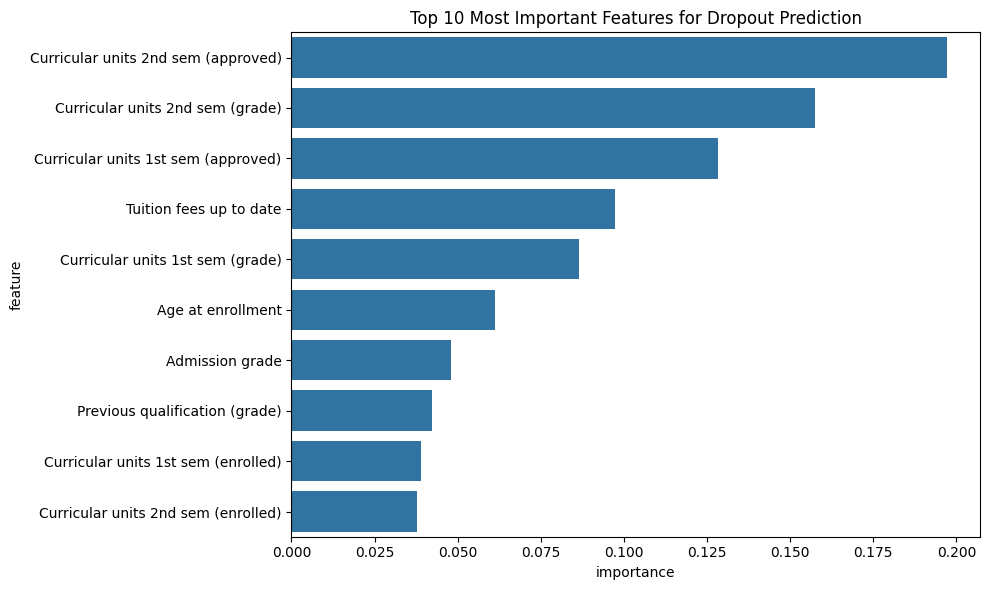

In [ ]:

# 9. FEATURE IMPORTANCE
print("🔍 STEP 9: ANALYZING FEATURE IMPORTANCE...")
feature_importance = pd.DataFrame({
    'feature': available_features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("TOP 10 MOST IMPORTANT FEATURES:")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features for Dropout Prediction')
plt.tight_layout()
plt.show()

In [ ]:
# 10. SAVE MODEL FILES
print("\n💾 STEP 10: SAVING MODEL FILES...")

# Save the trained model
joblib.dump(model, 'dropout_model.pkl')
print("✅ dropout_model.pkl saved")

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')
print("✅ scaler.pkl saved")

# Save the feature list
joblib.dump(available_features, 'features.pkl')
print("✅ features.pkl saved")

# Create and save feature ranges for Streamlit app
feature_ranges = {}
for feature in available_features:
    feature_ranges[feature] = {
        'min': float(X[feature].min()),
        'max': float(X[feature].max()),
        'mean': float(X[feature].mean())
    }
joblib.dump(feature_ranges, 'feature_ranges.pkl')
print("✅ feature_ranges.pkl saved")


💾 STEP 10: SAVING MODEL FILES...
✅ dropout_model.pkl saved
✅ scaler.pkl saved
✅ features.pkl saved
✅ feature_ranges.pkl saved


In [ ]:






# 11. DOWNLOAD FILES
print("\n📥 STEP 11: DOWNLOADING FILES TO YOUR COMPUTER...")
print("These 4 files will be downloaded:")

files.download('dropout_model.pkl')
print("📄 dropout_model.pkl - Trained ML model")

files.download('scaler.pkl')
print("📄 scaler.pkl - Feature scaler")

files.download('features.pkl')
print("📄 features.pkl - Feature list")

files.download('feature_ranges.pkl')
print("📄 feature_ranges.pkl - Value ranges")

print("\n🎉 ALL 4 FILES DOWNLOADED SUCCESSFULLY!")
print("\n🚀 NEXT STEPS:")
print("1. Check your Downloads folder for the 4 .pkl files")
print("2. Copy them into your dropout_app folder")
print("3. Run: streamlit run app.py")


📥 STEP 11: DOWNLOADING FILES TO YOUR COMPUTER...
These 4 files will be downloaded:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📄 dropout_model.pkl - Trained ML model


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📄 scaler.pkl - Feature scaler


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📄 features.pkl - Feature list


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📄 feature_ranges.pkl - Value ranges

🎉 ALL 4 FILES DOWNLOADED SUCCESSFULLY!

🚀 NEXT STEPS:
1. Check your Downloads folder for the 4 .pkl files
2. Copy them into your dropout_app folder
3. Run: streamlit run app.py
